In [1]:
import numpy as np
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestRegressor
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data_dir = '/storage/yw18581/data/'
data_folder = os.path.join(data_dir, 'train_validation_test')
clean_dir = os.path.join(data_folder, 'clean_300')

In [3]:
def cut_X(arr, reshape = None):
    x_cut = arr[:,960:1300,600:]
    if reshape:
        if len(x_cut.shape)>3:
            x_cut = x_cut[...,0]
            x_cut_out = x_cut.reshape(x_cut.shape[0],x_cut.shape[1]*x_cut.shape[2])
    else:
        x_cut_out = x_cut
    return x_cut_out

def reshape_RF(arr):
    arr_RF = arr.reshape((arr.shape[0], arr.shape[1]*arr.shape[2]))
    return arr_RF

In [17]:
def cut_reshape(arr):
    arr_cut = cut_X(arr)
    arr_RF = reshape_RF(arr_cut)
    return arr_RF

In [10]:
def load_data(folder, dist):
    X = np.load(os.path.join(folder, "Xy_{}mm_clean_300.npz".format(dist)))["y"]
    y = np.load(os.path.join(folder, "Xy_{}mm_clean_300.npz".format(dist)))["dist"]
    return X, y

In [16]:
X_1mm, y_1mm = load_data(clean_dir, 1)
X_2mm, y_2mm = load_data(clean_dir, 2)
X_3mm, y_3mm = load_data(clean_dir, 3)
X_4mm, y_4mm = load_data(clean_dir, 4)
X_10mm, y_10mm = load_data(clean_dir, 10)
X_15mm, y_15mm = load_data(clean_dir, 15)
X_20mm, y_20mm = load_data(clean_dir, 20)
X_25mm, y_25mm = load_data(clean_dir, 25)
X_30mm, y_30mm = load_data(clean_dir, 30)
X_35mm, y_35mm = load_data(clean_dir, 35)

In [20]:
X_1mm_RF = cut_reshape(X_1mm)
X_2mm_RF = cut_reshape(X_2mm)
X_3mm_RF = cut_reshape(X_3mm)
X_4mm_RF = cut_reshape(X_4mm)
X_10mm_RF = cut_reshape(X_10mm)
X_15mm_RF = cut_reshape(X_15mm)
X_20mm_RF = cut_reshape(X_20mm)
X_25mm_RF = cut_reshape(X_25mm)
X_30mm_RF = cut_reshape(X_30mm)
X_35mm_RF = cut_reshape(X_35mm)

In [21]:
rf = joblib.load(os.path.join(data_dir,"trained_models","Leaf_position_regression","leaf_regression_RF_30est_8depth.pkl"))

In [22]:
preds_15mm = rf.predict(X_15mm_RF)

In [23]:
mean_squared_error(y_15mm, preds_15mm)

0.12083333333333333

In [24]:
X_train_dataset = np.vstack([X_2mm_RF, X_4mm_RF, X_10mm_RF, X_25mm_RF])
y_train_dataset = np.hstack([y_2mm, y_4mm, y_10mm, y_25mm])

In [25]:
preds = rf.predict(X_train_dataset)

In [26]:
mean_squared_error(preds, y_train_dataset)

0.0007000000000000001

In [40]:
import numpy as np
from scipy.stats import norm

def plot_histo(preds, true, xmin, xmax, nbins_fit, nbins_hist=8):
    data = preds-true
    mean,std=norm.fit(data)

    plt.hist(data, bins=nbins_hist, density=True, facecolor='white',edgecolor ="k",  alpha=1, label="data")
    #xmin, xmax = plt.xlim()
    x = np.linspace(xmin,xmax, nbins_fit)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y, c='r', linestyle='-.', label='gaussian fit')
    plt.xlabel('prediction error [mm]')
    #plt.ylabel('Frequence')
    plt.title(r'$\mathrm{Resolution\ histogram:}\ \mu=%.3f,\ \sigma=%.3f$' %(mean, std))
    plt.legend(loc='upper right')
    return

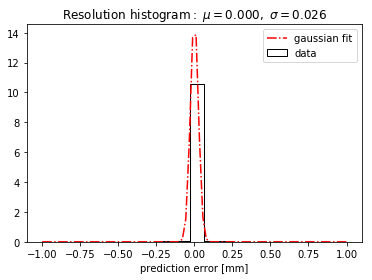

In [50]:
plot_histo(preds, y_train_dataset, -1.0,1.0, nbins_fit=90, nbins_hist=10)
#plt.savefig("resolution_histo_15mm_UNet.png")

In [61]:
def import_splitted_gt(pos):
    Xy = np.load(os.path.join(clean_dir,"Xy_"+pos+"_clean_300.npz"))
    X = Xy["y"]
    y = Xy["dist"]
    X_RF = cut_reshape(X)
    indices = np.load(os.path.join(clean_dir,"RF_train_test_indices_80_20_"+pos+"_clean.npz"))
    training_indices = indices["train"]
    test_indices = indices["test"]
    X_RF_train = X_RF[training_indices]
    y_train = y[training_indices]
    X_RF_test = X_RF[test_indices]
    y_test = y[test_indices]
    return X_RF_train, y_train, X_RF_test, y_test

In [62]:
X_1mm_cl_RF_train, y_1mm_cl_train, X_1mm_cl_RF_test, y_1mm_cl_test  = import_splitted_gt("1mm")
X_2mm_cl_RF_train, y_2mm_cl_train, X_2mm_cl_RF_test, y_2mm_cl_test = import_splitted_gt("2mm")
X_3mm_cl_RF_train, y_3mm_cl_train, X_3mm_cl_RF_test, y_3mm_cl_test = import_splitted_gt("3mm")
X_4mm_cl_RF_train, y_4mm_cl_train, X_4mm_cl_RF_test, y_4mm_cl_test= import_splitted_gt("4mm")
X_10mm_cl_RF_train, y_10mm_cl_train, X_10mm_cl_RF_test, y_10mm_cl_test = import_splitted_gt("10mm")
X_15mm_cl_RF_train, y_15mm_cl_train, X_15mm_cl_RF_test, y_15mm_cl_test = import_splitted_gt("15mm")
X_20mm_cl_RF_train, y_20mm_cl_train, X_20mm_cl_RF_test, y_20mm_cl_test = import_splitted_gt("20mm")
X_25mm_cl_RF_train, y_25mm_cl_train, X_25mm_cl_RF_test, y_25mm_cl_test = import_splitted_gt("25mm")
X_30mm_cl_RF_train, y_30mm_cl_train, X_30mm_cl_RF_test, y_30mm_cl_test = import_splitted_gt("30mm")
X_35mm_cl_RF_train, y_35mm_cl_train, X_35mm_cl_RF_test, y_35mm_cl_test = import_splitted_gt("35mm")

In [63]:
X_test_cl_RF = np.vstack([X_2mm_cl_RF_test, X_4mm_cl_RF_test, X_10mm_cl_RF_test, X_25mm_cl_RF_test])
y_test_cl_RF = np.hstack([y_2mm_cl_test, y_4mm_cl_test, y_10mm_cl_test, y_25mm_cl_test])

In [64]:
X_test_cl_RF.shape

(240, 272000)

In [65]:
y_test_cl_RF.shape

(240,)

In [66]:
preds_gt = rf.predict(X_test_cl_RF)

In [67]:
mean_squared_error(preds_gt, y_test_cl_RF)

0.00025925925925925964

In [68]:
preds_15mm = rf.predict(X_15mm_cl_RF_test)

In [69]:
mean_squared_error(preds_15mm, y_15mm_cl_test)

0.10833333333333334

In [73]:
def import_splitted_UNet(pos):
    Xy = np.load(os.path.join(clean_dir,"Xy_"+pos+"_clean_300_predicted_UNet.npz"))
    X = Xy["y"]
    y = Xy["dist"]
    X_RF = cut_reshape(X)
    indices = np.load(os.path.join(clean_dir,"RF_train_test_indices_80_20_"+pos+"_clean.npz"))
    training_indices = indices["train"]
    test_indices = indices["test"]
    X_RF_train = X_RF[training_indices]
    y_train = y[training_indices]
    X_RF_test = X_RF[test_indices]
    y_test = y[test_indices]
    return X_RF_train, y_train, X_RF_test, y_test

In [74]:
X_1mm_cl_UNet_RF_train, y_1mm_cl_UNet_train, X_1mm_cl_UNet_RF_test, y_1mm_cl_UNet_test  = import_splitted_UNet("1mm")
X_2mm_cl_UNet_RF_train, y_2mm_cl_UNet_train, X_2mm_cl_UNet_RF_test, y_2mm_cl_UNet_test  = import_splitted_UNet("2mm")
X_3mm_cl_UNet_RF_train, y_3mm_cl_UNet_train, X_3mm_cl_UNet_RF_test, y_3mm_cl_UNet_test  = import_splitted_UNet("3mm")
X_4mm_cl_UNet_RF_train, y_4mm_cl_UNet_train, X_4mm_cl_UNet_RF_test, y_4mm_cl_UNet_test  = import_splitted_UNet("4mm")
X_10mm_cl_UNet_RF_train, y_10mm_cl_UNet_train, X_10mm_cl_UNet_RF_test, y_10mm_cl_UNet_test  = import_splitted_UNet("10mm")
X_15mm_cl_UNet_RF_train, y_15mm_cl_UNet_train, X_15mm_cl_UNet_RF_test, y_15mm_cl_UNet_test  = import_splitted_UNet("15mm")
X_20mm_cl_UNet_RF_train, y_20mm_cl_UNet_train, X_20mm_cl_UNet_RF_test, y_20mm_cl_UNet_test  = import_splitted_UNet("20mm")
X_25mm_cl_UNet_RF_train, y_25mm_cl_UNet_train, X_25mm_cl_UNet_RF_test, y_25mm_cl_UNet_test  = import_splitted_UNet("25mm")
X_30mm_cl_UNet_RF_train, y_30mm_cl_UNet_train, X_30mm_cl_UNet_RF_test, y_30mm_cl_UNet_test  = import_splitted_UNet("30mm")
X_35mm_cl_UNet_RF_train, y_35mm_cl_UNet_train, X_35mm_cl_UNet_RF_test, y_35mm_cl_UNet_test  = import_splitted_UNet("35mm")\


In [75]:
X_UNet_test = np.vstack((X_2mm_cl_UNet_RF_test, X_4mm_cl_UNet_RF_test, 
                         X_10mm_cl_UNet_RF_test, X_25mm_cl_UNet_RF_test))

y_UNet_test =  np.hstack((y_2mm_cl_UNet_test, y_4mm_cl_UNet_test, 
                          y_10mm_cl_UNet_test, y_25mm_cl_UNet_test))

In [76]:
preds_unet = rf.predict(X_UNet_test)

In [77]:
mean_squared_error(preds_unet, y_UNet_test)

0.04657407407407407

In [78]:
preds_15mm_unet = rf.predict(X_15mm_cl_UNet_RF_test)

In [81]:
mean_squared_error(preds_15mm_unet-1, y_15mm_cl_UNet_test)

0.4666666666666667

In [90]:
np.savez_compressed("out_data_300.npz", y_gt = y_test_cl_RF, preds_gt = preds_gt,
                    y_unet = y_UNet_test, preds_unet = preds_unet, 
                   y_15_unet = y_15mm_UNet, preds_15_unet =preds_15_unet-1,
                   y_15_gt = y_15mm_gt, preds_15_gt = preds_15_gt)

In [85]:
X_15mm_UNet = np.vstack([X_15mm_cl_UNet_RF_test, X_15mm_cl_UNet_RF_train])
y_15mm_UNet = np.hstack([y_15mm_cl_UNet_test, y_15mm_cl_UNet_train])

In [86]:
X_15mm_gt = np.vstack([X_15mm_cl_RF_test, X_15mm_cl_RF_train])
y_15mm_gt = np.hstack([y_15mm_cl_test, y_15mm_cl_train])

In [87]:
preds_15_gt = rf.predict(X_15mm_gt)
mean_squared_error(preds_15_gt, y_15mm_gt)

0.12083333333333333

In [89]:
preds_15_unet = rf.predict(X_15mm_UNet)
mean_squared_error(preds_15_unet-1, y_15mm_UNet)

0.4266666666666667